# Notebook 3: Gradient Descent

In this notebook, you will manually implement inference for a ___linear model___ using gradient descent.

Please create a Python class `LinearModel` that contains (at least) the following methods:
1. `__init__`
1. `train`: Parameter inferences based on target variable (`y`) and feature (`x`) data sets
1. `predict`: Predict target variable for a (new) feature data set (`x`)
1. `coef`: returns the estimated coefficients
1. `cost`: returns the final value for the cost function for the training data set

In [1]:
import common
import matplotlib.animation
import matplotlib.gridspec
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model  # our reference solution

## Mathematical background <a id='mathematical_background'></a>

### Formal representation of the problem

Let's look at a linear model

$
\quad y_i = w\, x_i + b
$

that represents our hypothesis $h$.

Here, 

- $y_i$ is the dependent variable,
- $x_i$ the feature vector, and
- $b$ (intercept) and $w$ (slope) are the coefficients (or weights).

### Cost function

We want to find coefficients $b$ and $w$ that make $h(x_i)$ similar to $y_i$ (for the training samples in $\mathcal{X}$). This guides our choice for the cost function $J$. 

With
- the prediction $\hat y_i$ and
- the prediction error $e_i$

follows

$
\quad J(b,w) \\
\quad\quad = \displaystyle \frac 1 n \sum_{i=1}^{n} e_i^2 \\
\quad\quad = \displaystyle \frac 1 n \sum_{i=1}^{n} (y_i - \hat y_i)^2 \\
\quad\quad = \displaystyle \frac 1 n \sum_{i=1}^{n} (y_i - (w\, x_i + b))^2
$

### Update equations

Gradient descent starts with an initial guess for $b$ and $w$ and then iterates to minimize $J$. With the learning rate $\alpha$, we have the following weight upgrade equations

$
\quad\displaystyle w' = w - \alpha\,\partial_w J(b,\,w)
$

and

$
\quad\displaystyle b' = b - \alpha\, \partial_b J(b,\,w)
$

where $\partial_w J(b,\,w)$ and $\partial_b J(b,\,w)$ are the partial derivatives of the cost function with regard our parameters $w$ and $b$.

The partial derivatives of $J$ are

$
\quad \nabla J(b,\,w) \\
\quad\quad = \begin{bmatrix} \partial_b J(b,w) \\ \partial_w J(b,w) \end{bmatrix} \\
\quad\quad = \begin{bmatrix}
        \displaystyle\frac 2 n \sum_{i=1}^{n} -    (y_i - (w\, x_i + b)) \\
        \displaystyle\frac 2 n \sum_{i=1}^{n} -x_i (y_i - (w\, x_i + b))
\end{bmatrix} 
$

Some notes:
- Gradient descent repeatedly takes a step in the direction of steepest decrease of $J$ (as the name suggests).
- The magnitude of the update is proportional to the prediction error.

### Example visualization

This example visualization shows how gradient descent minimizes the squared errors. Here, $b$ is set to 0 and $w$ is 1.

<img src="https://raw.githubusercontent.com/sbstn-gbl/learning-from-big-data/master/source/_static/img/variance-explained.gif" width="500">

[(Source)](https://mlfromscratch.com/linear-regression-from-scratch/)

## Simulate some data

Our data generating process is a linear model

$
\quad y_i = w\, x_i + b + \epsilon
$

We'll use

- $b^{true} = 3$
- $w^{true} = -3$
- $\varepsilon \sim \mathcal{N}(\mu_{\varepsilon}, \sigma_{\varepsilon})$ with $\mu_{\varepsilon}=0$ and $\sigma_{\varepsilon}=1$

In [2]:
# input
N = 100  # number of observations
b_true = 3  # offset
w_true = -3  # slope
sigma_err = 1  # standard deviation of error term

In [3]:
# set seed for reproducibility
np.random.seed(123)

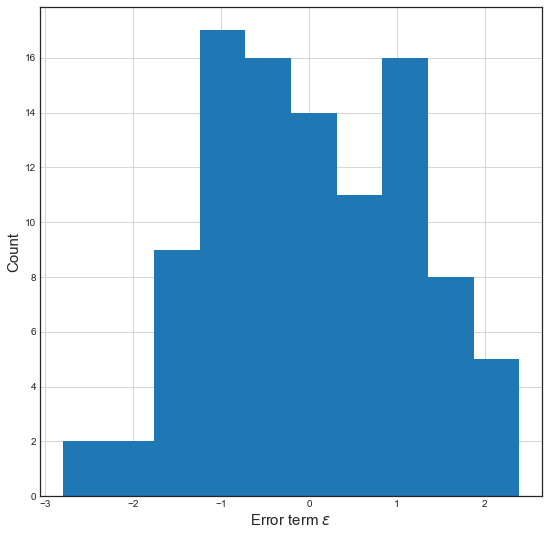

In [4]:
# error term
err = np.random.normal(0, sigma_err, N)
plt.hist(err)
plt.xlabel(r"Error term $\varepsilon$")
plt.ylabel("Count")
plt.show()

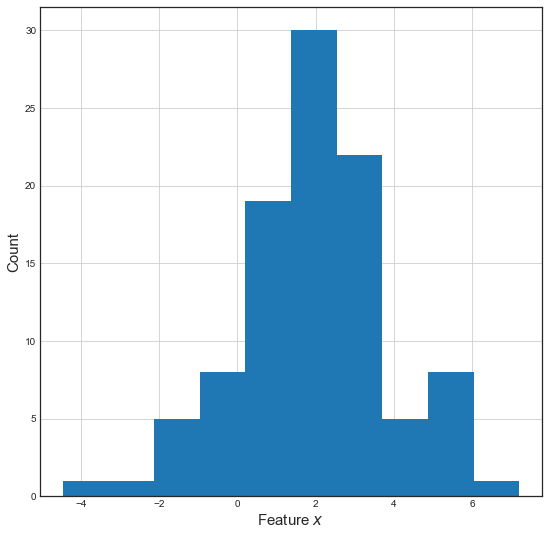

In [5]:
# features
x = np.random.normal(2, 2, N)
plt.hist(x)
plt.xlabel(r"Feature $x$")
plt.ylabel("Count")
plt.show()

In [6]:
# compute dependent variable
y = w_true * x + b_true + err

## Implementation in `sklearn`

Let's check whether the true parameters can be inferred from the data.

In [7]:
res_sklearn = sklearn.linear_model.LinearRegression().fit(x.reshape(-1, 1), y.reshape(-1, 1))
print(f"b_hat = {res_sklearn.intercept_[0]: .2f}")
print(f"w_hat = {res_sklearn.coef_[0][0]: .2f}")

b_hat =  3.05
w_hat = -3.01


## Manual implementation

In [8]:
# please add your custom implementation here

## Additional scope

### Comparison of different gradient descent methods

We differentiate three approaches to implement gradient descent:
1. Batch gradient descent
2. Stochastic gradient descent
3. Mini-batch gradient descent

<img src="https://raw.githubusercontent.com/sbstn-gbl/learning-from-big-data/master/source/_static/img/gradient-descent.png" width="900">

Extend your implementation above to support all three versions of gradient descent.

Some questions to consider:
- What are the advantages/disadvantages of the different gradient descent methods?
- What do you need to change in your implementation for other models, e.g., binary logistic regression?
- In the above picture we sum over the partial derivatives, instead of averaging the individual values (compare section [Mathematical background](#mathematical_background)). Why is that ok?

### Some notable extensions and variants of gradient descent

- Gradient descent with momentum
- Averaged gradient descent
- AdaGrad
- RMSProp
- Adam

Check the documentation of neural network frameworks (e.g., PyTorch, Keras).

<br>
<br>
&mdash; <br>
Sebastian Gabel <br>
`Learning from Big Data` 2021/22 <br>